  0%|          | 0/3 [00:00<?, ?it/s]

the type of scan is: Neck  5.0  B31s
WL: 55 WW: 300
The actual shape of the scan is: (38, 512, 512)


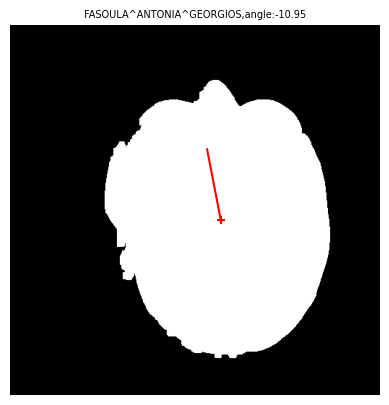

the initial angle is:  -10.952356314502879
patient's name:FASOULA^ANTONIA^GEORGIOS,patient's sex:F,patients'age:56,Glasgow Coma Scale:NA,Class:1
----------------------------------------------------------------------------------------------------
0.0 1.0


 33%|███▎      | 1/3 [00:57<01:55, 57.86s/it]

the type of scan is: head
WL: 30 WW: 300
The actual shape of the scan is: (164, 512, 512)


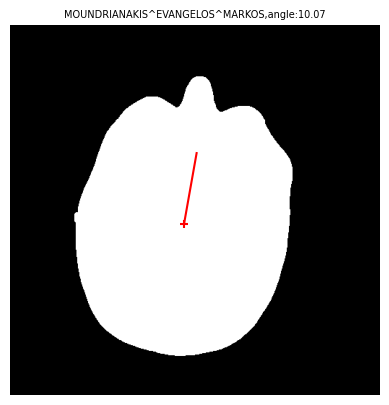

the initial angle is:  10.073478598737836
patient's name:MOUNDRIANAKIS^EVANGELOS^MARKOS,patient's sex:M,patients'age:47,Glasgow Coma Scale:4,Class:0
----------------------------------------------------------------------------------------------------
0.0 1.0


 67%|██████▋   | 2/3 [02:19<01:11, 71.96s/it]

the type of scan is: RoutineSeq  1.5  H30s
WL: 38 WW: 90
The actual shape of the scan is: (120, 512, 512)


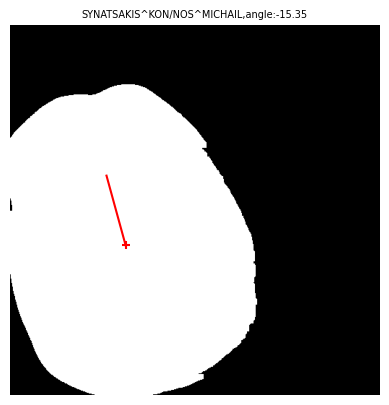

the initial angle is:  -15.351498259188133
procceding rotation... <-14 degrees
angle in perpenticular plane: -15.351498259188133
patient's name:SYNATSAKIS^KON/NOS^MICHAIL,patient's sex:M,patients'age:24,Glasgow Coma Scale:15,Class:0
0.0 1.0


  0%|          | 0/3 [00:00<?, ?it/s]

the type of scan is: Neck  5.0  B31s
WL: 55 WW: 300
The actual shape of the scan is: (38, 512, 512)


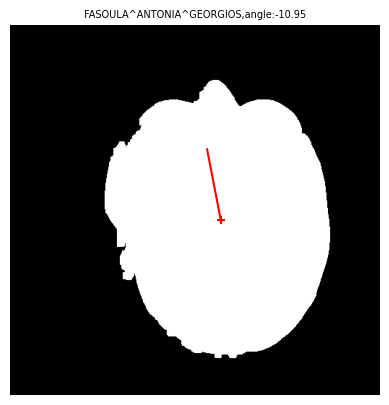

the initial angle is:  -10.952356314502879
patient's name:FASOULA^ANTONIA^GEORGIOS,patient's sex:F,patients'age:56,Glasgow Coma Scale:NA,Class:1
----------------------------------------------------------------------------------------------------
0.0 1.0


 33%|███▎      | 1/3 [01:16<02:32, 76.36s/it]

the type of scan is: head
WL: 30 WW: 300
The actual shape of the scan is: (164, 512, 512)


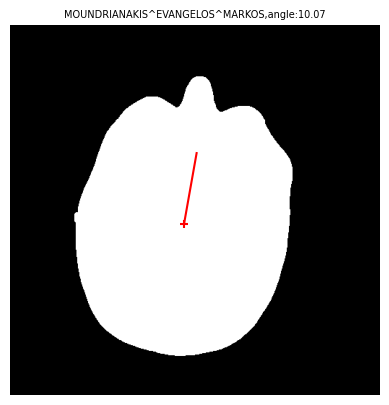

the initial angle is:  10.073478598737836
patient's name:MOUNDRIANAKIS^EVANGELOS^MARKOS,patient's sex:M,patients'age:47,Glasgow Coma Scale:4,Class:0
----------------------------------------------------------------------------------------------------
0.0 1.0


 67%|██████▋   | 2/3 [03:08<01:37, 97.25s/it]

the type of scan is: RoutineSeq  1.5  H30s
WL: 38 WW: 90
The actual shape of the scan is: (120, 512, 512)


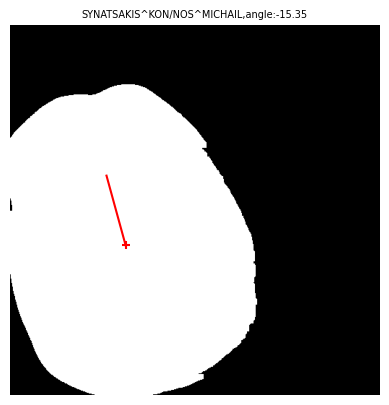

the initial angle is:  -15.351498259188133
procceding rotation... <-14 degrees
angle in perpenticular plane: -15.351498259188133
patient's name:SYNATSAKIS^KON/NOS^MICHAIL,patient's sex:M,patients'age:24,Glasgow Coma Scale:15,Class:0
0.0 1.0


100%|██████████| 3/3 [04:12<00:00, 84.01s/it]


(6,)

In [6]:
import pydicom as dcm
import os
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from segment_brain import segment
from tqdm import tqdm
import re
from CT_DATASET_module_with_Classes_rescale import *

PATH_WITH_ALL_SCANS = r'C:\Users\aktinologiko\Desktop\ALL SCANS' 
PATH_WITH_ALL_SCANS2 = r'C:\Users\aktinologiko\Desktop\ALL SCANS2'  # New folder path
desired_volume_dims_after_resampling = (120, 512, 512)
THRESHOLD = 20
all_patients = CT_DATASET(PATH_WITH_ALL_SCANS, desired_volume_dims_after_resampling)

patients = []
# Loop over files in the first folder
for patient in tqdm(os.listdir(PATH_WITH_ALL_SCANS)):  
    patients.append(all_patients.process_scan(os.path.join(PATH_WITH_ALL_SCANS, patient), patient))

# Loop over files in the second folder
for patient in tqdm(os.listdir(PATH_WITH_ALL_SCANS2)):  
    patients.append(all_patients.process_scan(os.path.join(PATH_WITH_ALL_SCANS2, patient), patient))

patients = np.array(patients)
patients.shape


In [7]:
np.save("patients_patches",patients)

In [1]:

import pydicom as dcm
import os
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from segment_brain import segment
from tqdm import tqdm
import re


patients = np.load("patients_patches.npy",allow_pickle=True)


In [8]:
from Create_Patches import create_patches

from sklearn.preprocessing import LabelEncoder


##############################
labels_sex = np.array([patients[i]['sex']  for i in range(len(patients)) ]) #array([[0],
       #                                                                            [0]])
le_sex = LabelEncoder()
le_sex.fit(labels_sex)
labels_sex_transf = le_sex.transform(labels_sex)
labels_sex_transf #array([0, 0], dtype=int64)
# ##############################################
labels_age = np.array([patients[i]['age']  for i in range(len(patients)) ]) #array(['38', '38'], dtype='<U2')

labels_age_categ = []
for age in labels_age:
    if age=='NA':
        labels_age_categ.append('NA')
    elif int(age)<30:
        labels_age_categ.append('Adult')
    elif int(age)>=30 and int(age)<60:
        labels_age_categ.append('Middle')
    else:
        labels_age_categ.append('Old')

labels_age_categ =np.array(labels_age_categ)

def age_(age):
    if age=='NA':
        return np.array(['NA'])
    elif int(age)<30:
        return np.array(['Adult'])
    elif int(age)>=30 and int(age)<60:
        return np.array(['Middle'])
    else:
        return np.array(['Old'])

le_age = LabelEncoder()
le_age.fit(labels_age_categ)

# ####################################################################
labels_GCS = np.array([patients[i]['Glasgow Coma Scale']  for i in range(len(patients)) ])
labels_GCS_categ = []
for GCS in labels_GCS:
    if GCS=='NA':
        labels_GCS_categ.append('NA')
    elif int(GCS)<=8:
        labels_GCS_categ.append('HIGH')
    else:
        labels_GCS_categ.append('LOW')

labels_GCS_categ =np.array(labels_GCS_categ)

def gcs_(GCS):

    if GCS=='NA':
        return np.array(['NA'])
    elif int(GCS)<=8:
        return np.array(['HIGH'])
    else:
        return np.array(['LOW'])

le_gcs = LabelEncoder()
le_gcs.fit(labels_GCS_categ)

# ########################################################
from segment_brain import segment_all_patients_slices
from tqdm import tqdm


for patient in tqdm(range(len(patients))):
    volume = np.expand_dims(patients[patient]['volume'],axis=0)
    volume = np.transpose(volume,(0,2,3,1))
    volume = segment_all_patients_slices(volume)
    patients[patient]['volume']=create_patches(volume)

    patients[patient]['sex'] =  int(le_sex.transform(np.array( [patients[patient]['sex']])))
    patients[patient]['age'] =  int(le_age.transform(age_(patients[patient]['age'])))
    patients[patient]['Glasgow Coma Scale'] = int( le_gcs.transform(gcs_(patients[patient]['Glasgow Coma Scale'])))
    patients[patient]['Class']=int(patients[patient]['Class'])

  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\aktinologiko\AppData\Local\Temp\ipykernel_15276\2168371826.py:78: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  patients[patient]['sex'] =  int(le_sex.transform(np.array( [patients[patient]['sex']])))
C:\Users\aktinologiko\AppData\Local\Temp\ipykernel_15276\2168371826.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  patients[patient]['age'] =  int(le_age.transform(age_(patients[patient]['age'])))
C:\Users\aktinologiko\AppData\Local\Temp\ipykernel_15276\2168371826.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you 

In [9]:
X = np.squeeze(np.array([patients[i]['volume']  for i in range(len(patients)) ]),axis=1)
# X =np.transpose(X,(0,2,3,1))
print(X.shape)


(6, 16, 128, 128, 120)


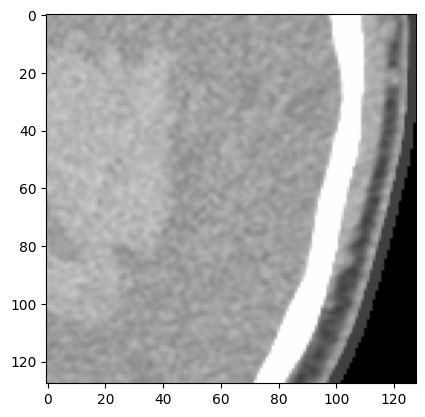

In [3]:
plt.imshow((X[1][10,:,:,65]),cmap='gray')

In [10]:
y = np.array (  [patients[i]['Class']  for i in range(len(patients)) ]).astype('int32')
y

array([1, 0, 0, 1, 0, 0])

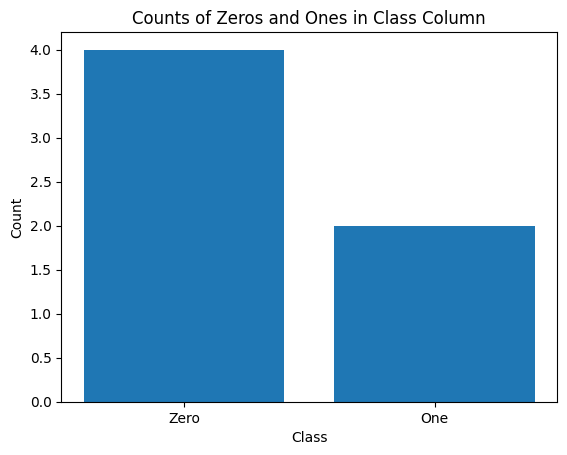

In [11]:
import pandas as pd

name = np.array([patients[i]['name']  for i in range(len(patients)) ])

data = {
    'name': name,
    'sex': labels_sex,
    'age': labels_age_categ,
    'gcs': labels_GCS_categ,
    'class': y
}
df=pd.DataFrame(data)
class_counts = df['class'].value_counts()
# # Plot
plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, ['Zero', 'One'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Zeros and Ones in Class Column')
plt.show()

In [12]:
def unite(name):
    name = str(name)
    name1 = name.split('^')[0]
    name2 = name.split('^')[1]
    name1 = "".join(name1)
    name2 = "".join(name2)
    return name1+" "+name2

df=pd.DataFrame(data)
df['name_']=df['name'].apply(lambda x:unite(x))
df = df.drop('name',axis=1)
df = df.rename(columns={'name_': 'name'})
df = df [['name', 'sex', 'age', 'gcs', 'class']]

df

,name,sex,age,gcs,class
0,FASOULA ANTONIA,F,Middle,NA,1
1,MOUNDRIANAKIS EVANGELOS,M,Middle,HIGH,0
2,SYNATSAKIS KON/NOS,M,Adult,LOW,0
3,FASOULA ANTONIA,F,Middle,NA,1
4,MOUNDRIANAKIS EVANGELOS,M,Middle,HIGH,0
5,SYNATSAKIS KON/NOS,M,Adult,LOW,0


In [13]:
# patients[1]['age'] #labels_sex_trans array([0, 1, 1, 0, 1, 1])
labels_age_transf = np.array([patients[i]['age'] for i in range(len(patients))])
labels_sex_transf = np.array([patients[i]['sex'] for i in range(len(patients))])
labels_GCS_transf = np.array([patients[i]['Glasgow Coma Scale'] for i in range(len(patients))])


In [14]:
from sklearn.model_selection import train_test_split
X_train_,  X_test_,  y_train_, y_test_,   labels_sex_train_, labels_sex_test_,  labels_age_train_, labels_age_test_ ,label_GCS_train_, label_GCS_test_= train_test_split( X, y,
                                                                                                                                                                labels_sex_transf,
                                                                                                                                                                labels_age_transf,
                                                                                                                                                                labels_GCS_transf,
                                                                                                                                                                test_size=0.2)

In [31]:

np.repeat(y, X.shape[1]).shape

(96,)

In [25]:

X_train = np.reshape(X_train_,(-1,128,128,120))
X_test = np.reshape(X_test_,(-1,128,128,120))                    
X_train.shape,X_test.shape

((64, 128, 128, 120), (32, 128, 128, 120))

In [32]:
labels_sex_train = np.repeat(labels_sex_train_, X.shape[1])
labels_sex_test =np.repeat(labels_sex_test_, X.shape[1])

labels_age_train = np.repeat(labels_age_train_, X.shape[1])
labels_age_test = np.repeat(labels_age_test_, X.shape[1])

label_GCS_train = np.repeat(label_GCS_train_, X.shape[1])
label_GCS_test = np.repeat(label_GCS_test_,X.shape[1])

label_GCS_train = np.repeat(label_GCS_train_, X.shape[1])
label_GCS_test = np.repeat(label_GCS_test_,X.shape[1])

label_GCS_train = np.repeat(label_GCS_train_, X.shape[1])
label_GCS_test = np.repeat(label_GCS_test_,X.shape[1])


y_train = np.repeat(y_train_, X.shape[1])
y_test = np.repeat(y_test_, X.shape[1])


In [39]:
from My_model import MultipleInputsModel_TURBO

model =MultipleInputsModel_TURBO(input_shape=(128,128,120),sex_label_shape=(1,),age_label_shape=(1,),GCS_label_shape=(1,),
                           age_num_classes=len(np.unique(labels_age_transf)),
                           sex_num_classes=len(np.unique(labels_sex_transf)),
                           GCS_num_classes=len(np.unique(labels_GCS_transf)),
                           )


In [40]:
import tensorflow as tf
import numpy as np
from scipy import ndimage
import random


from augmentations import CT_augmentations
def train_preprocessing(volume, labels_sex,labels_age,labels_gcs,y):
# def train_preprocessing(volume,y):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    # volume = rotate(volume)
    volume = CT_augmentations(volume)
    
    # volume = tf.expand_dims(volume, axis=3)
    print(volume.dtype)
    return (volume, labels_sex,labels_age,labels_gcs),y
    # return volume,y

def test_preprocessing(volume, labels_sex,labels_age,labels_gcs,y):
# def test_preprocessing(volume,y):

    # volume = tf.expand_dims(volume, axis=3)
    return (volume, labels_sex,labels_age,labels_gcs),y
    # return volume,y

In [ ]:
from augmentations import CT_augmentations
SLICE = np.random.randint(0,102)
PATIENT = np.random.randint(0,X.shape[0])
plt.figure(figsize=(20,10))
test_or =  X[PATIENT][:,:,SLICE]
test_art = CT_augmentations(X[PATIENT])[:,:,SLICE]
print(test_or[50,50],test_art[50,50], patients[PATIENT]['name'],SLICE)

plt.subplot(1,3,1),plt.imshow(test_or,cmap='gray')
plt.subplot(1,3,2),plt.imshow(test_art,cmap='gray')
plt.subplot(1,3,3),plt.hist(test_or)
plt.show()


In [41]:
import tensorflow as tf 

# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((X_train,    
                                                     labels_sex_train, 
                                                     labels_age_train, 
                                                     label_GCS_train, 
                                                     y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((X_test,    
                                                     labels_sex_test, 
                                                     labels_age_test, 
                                                     label_GCS_test, 
                                                     y_test))



# for volume,sex,age,gcs,label in train_loader:
#     print(volume.shape)

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(X_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(1)
)
# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(X_test))
    .map(test_preprocessing)
    .batch(batch_size)
    .prefetch(1)
)




<dtype: 'float64'>


In [43]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weight = {0:y[0], 1:y[1]}

In [44]:
epochs = 5
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    class_weight=class_weight,
    # callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/5
scipy_rotate
scipy_rotate
scipy_rotate
blur
scipy_rotate

blur
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
blur
scipy_rotate
blur
blur
blur
blur
blur
blur
blur
scipy_rotate
blur
blur
scipy_rotate
scipy_rotate
blur
scipy_rotate
blur
blur
scipy_rotate
blur
blur
scipy_rotate
blur
scipy_rotate
blur
blur
scipy_rotate
scipy_rotate
blur
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
scipy_rotate
blur
scipy_rotate
blur
scipy_rotate
blur
blur
blur
blur
blur
blur
scipy_rotate
blur
scipy_rotate
blur
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
blur
blur
scipy_rotate
32/32 - 47s - loss: nan - accuracy: 0.4688 - val_loss: nan - val_accuracy: 1.0000 - 47s/epoch - 1s/step
Epoch 2/5
scipy_rotate
blur
blur
scipy_rotate
scipy_rotate
blur
scipy_rotate
scipy_rotate
scipy_rotate
blur
blur
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
blur
scipy_rotate
blur
scipy_rotate
scipy_rotate
blur
scip

https://stackoverflow.com/questions/52582275/tf-data-with-multiple-inputs-outputs-in-keras

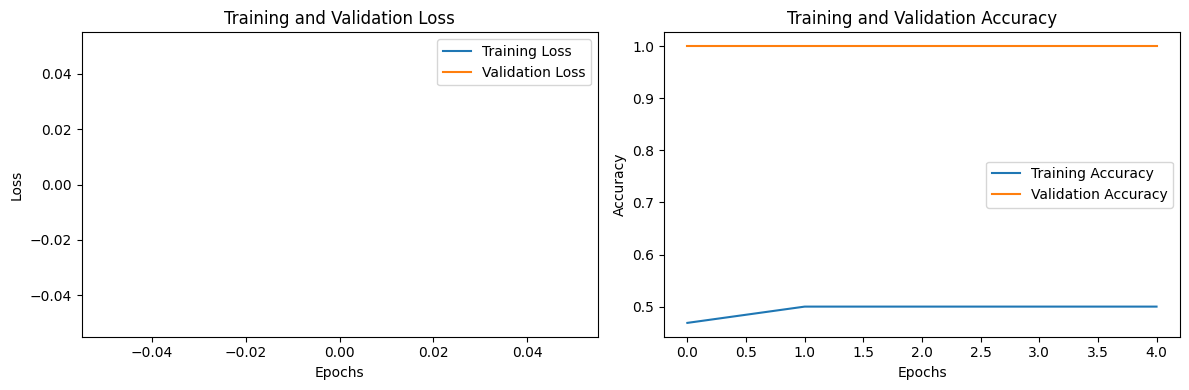

In [45]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:


import plotly.graph_objects as go
import plotly.express as px



# Create a Plotly figure for loss
fig_loss = go.Figure()

fig_loss.add_trace(go.Scatter(x=history.epoch,
                             y=history.history['loss'],
                             mode='lines',
                             name='Training Loss',
                             line=dict(color='blue')))
fig_loss.add_trace(go.Scatter(x=history.epoch,
                             y=history.history['val_loss'],
                             mode='lines',
                             name='Validation Loss',
                             line=dict(color='orange')))

fig_loss.update_layout(title='Training and Validation Loss',
                      xaxis_title='Epochs',
                      yaxis_title='Loss',
                      template='plotly_dark')

# Create a Plotly figure for accuracy
fig_accuracy = go.Figure()

fig_accuracy.add_trace(go.Scatter(x=history.epoch,
                                 y=history.history['accuracy'],
                                 mode='lines',
                                 name='Training Accuracy',
                                 line=dict(color='green')))
fig_accuracy.add_trace(go.Scatter(x=history.epoch,
                                 y=history.history['val_accuracy'],
                                 mode='lines',
                                 name='Validation Accuracy',
                                 line=dict(color='red')))

fig_accuracy.update_layout(title='Training and Validation Accuracy',
                          xaxis_title='Epochs',
                          yaxis_title='Accuracy',
                          template='plotly_dark')

# Show the figures
fig_loss.show()
fig_accuracy.show()



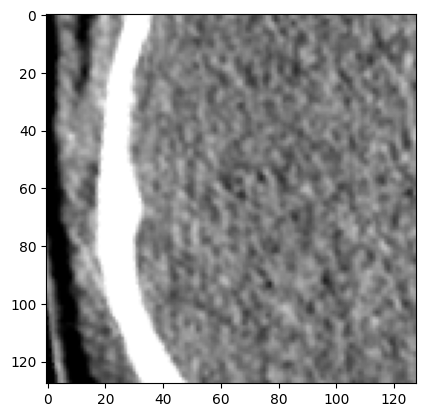

In [56]:
X_test.shape
plt.imshow(X_test[8,:,:,45],cmap='gray')

In [64]:
model.predict([X_test,labels_sex_test,labels_age_test,label_GCS_test] )

1/1 [==============================] - 3s 3s/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [68]:
model.predict([np.expand_dims(X_test[0],axis=0) ,   np.array([labels_sex_test[0]]),  np.array([labels_sex_test[0]]) ,np.array([label_GCS_test[0]])  ] ),y_test[0]

1/1 [==============================] - 0s 388ms/step


(array([[0.40966573]], dtype=float32), 1)

In [ ]:
#δεν παιζει τα labels

import numpy as np
from tensorflow.keras.preprocessing import image

# Assuming you have a single image file path, sex label, and age label
image_path = 'PATH_TO_IMAGE'
sex_label = 'Male'  # or 'Female'
age_label = 'Middle'  # or any appropriate age label

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Assuming you normalized your images during training

# Encode sex label
sex_encoded = le.transform([sex_label])

# Encode age label
age_encoded = np.array([age_label])

# Make the prediction
prediction = model.predict([np.expand_dims(X_test[0],axis=0), sex_encoded, age_encoded])

# Convert the prediction to a binary class (0 or 1)
binary_prediction = 1 if prediction > 0.5 else 0

print("Predicted Probability:", prediction)
print("Predicted Class:", binary_prediction)

Artifact augmentations

4.693433798199474e-53


(0.0, 1.0)

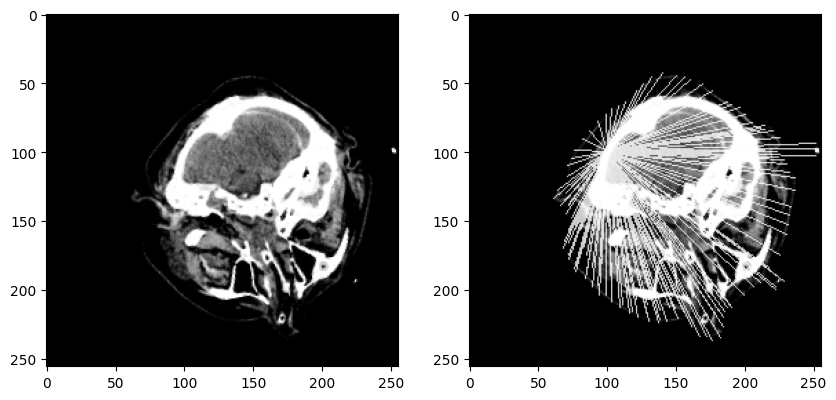

In [70]:

def create_probe_artifact(volume):
    def for_one_slice(image):
        img_copy = image.copy()
        THRESHOLD = 0.1
        thresh = img_copy*255>THRESHOLD
        # Find contours of bright regions
        contours, _ = cv2.findContours(thresh.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Draw star-like pattern on the image
        for contour in contours:
            # Calculate the centroid of each contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"]*2 / M["m00"]*0.02) #int(M["m10"] / M["m00"])
                cY = int(M["m01"]*1.6 / M["m00"]*0.2)
            else:
                cX, cY = 50, 50
            # Draw lines from centroid to contour points
            for point in contour[::7]:
                x, y = point[0]
                cv2.line(img_copy, (100, 100), (x, y), (255, 255, 255), 1)

            img_copy[img_copy<=0]=0 
            img_copy[img_copy>=img_copy.max()]=1
            img_copy[img_copy>=1]=1 

            image[image<=0]=0 
            image[image>=image.max()]=1
            image[image>=1]=1 


        return img_copy*0.8+image*0.2
    
    
    volume_with_artifact= []
    for slice in range(volume.shape[-1]):
        volume_with_artifact.append(for_one_slice(volume[:,:,slice]))
    volume_with_artifact = np.array(volume_with_artifact)
    volume_with_artifact = np.transpose(volume_with_artifact,(1,2,0))
    return volume_with_artifact

dist = create_probe_artifact(X[1])
print(dist[:,:,56][50,50])
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(X[1][:,:,24],cmap='gray')
plt.subplot(1,2,2),plt.imshow(dist[:,:,24],cmap='gray')

dist.min(),dist.max()

1.1968256185408658e-50


(<Axes: >, <matplotlib.image.AxesImage at 0x182d70ad250>)

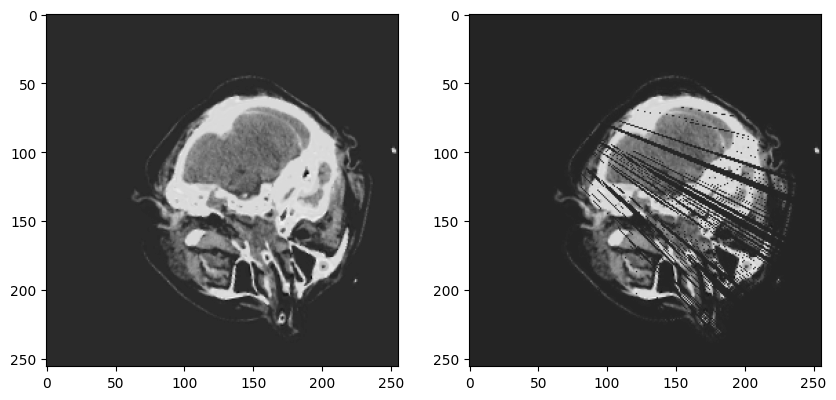

In [29]:
def create_probe_artifact(volume):
    def for_one_slice(image):
        img_copy = image.copy()
        THRESHOLD = 0.1
        thresh = img_copy*255>THRESHOLD
        # Find contours of bright regions
        contours, _ = cv2.findContours(thresh.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Draw star-like pattern on the image
        for contour in contours:
            # Calculate the centroid of each contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"]*2 / M["m00"]*0.02) #int(M["m10"] / M["m00"])
                cY = int(M["m01"]*1.6 / M["m00"]*0.2)
            else:
                cX, cY = 50, 50
            # Draw lines from centroid to contour points
            for point in contour:
                x, y = point[0]
                cv2.line(img_copy, (cX, cY), (x, y), (255, 255, 255), 1)
        distorted = img_copy*image
        return distorted
    
    
    volume_with_artifact= []
    for slice in range(volume.shape[-1]):
        volume_with_artifact.append(for_one_slice(volume[:,:,slice]))
    volume_with_artifact = np.array(volume_with_artifact)
    volume_with_artifact = np.transpose(volume_with_artifact,(1,2,0))
    return volume_with_artifact

dist = create_probe_artifact(X[1])
print(dist[:,:,56][50,50])
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(X[1][:,:,24],cmap='gray')
plt.subplot(1,2,2),plt.imshow(dist[:,:,24],cmap='gray')


In [39]:
y_test

array([0, 0])